In [1]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sahardeedahmed/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True


1. Search for a Business
2. Exit
Enter your choice: 1
Enter the name of the business: Charlie's Market
Enter the zip code: 33610

Businesses found:
1. Charlie's Market

Enter the number of the business to view details (0 to cancel): 1

Business Details:
Business ID: 0qNpTGTcqPwOLi2hADx4Xw
Name: Charlie's Market
Address: 2815 E Sligh Ave, Tampa, FL 33610
Categories: Food, Grocery, Convenience Stores
Rating: Good
Reviews:
Review 1: I used to come here a lot, especially when i was younger. I remember coming here and always buying Cuban sandwiches, or buying something to drink with the ruffles chips. After many years i am highly disappointed, some of their food taste old, or has no flavor, such as their cakes. I can't complain about their workers, their workers aren't mean, they do interact with you, and are friendly, even if they have a serious face they always tend and cater to their guests, but the food needs to be stepped up! The only plus side that i see is that they finally opened o

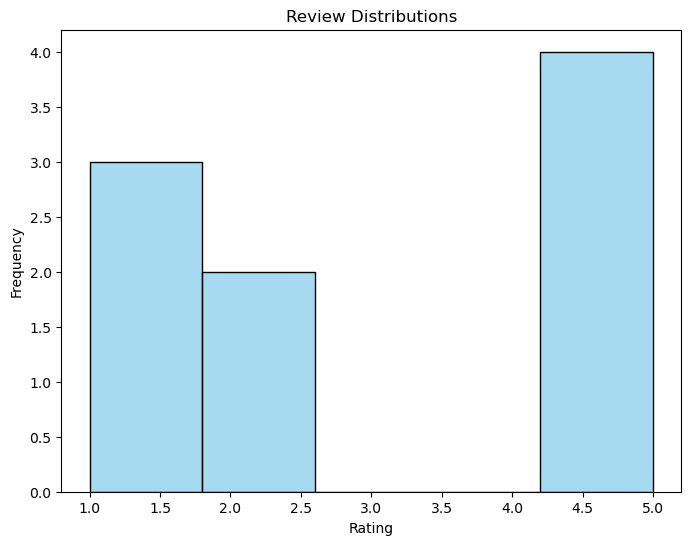


1. Search for a Business
2. Exit
Enter your choice: 2
Exiting the application...


In [2]:
import json
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Function to load the Yelp dataset from a JSON file
def load_dataset(file_path):
    dataset = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data = json.loads(line)
            dataset.append(data)
    return dataset

# Function to search for businesses by name and zip code
def search_businesses(dataset, name, zip_code):
    businesses_found = []
    for item in dataset:
        if name.lower() in item['name'].lower() and item['postal_code'] == zip_code:
            businesses_found.append(item)
    return businesses_found

# Function to search for reviews by business ID
def search_reviews_by_business_id(reviews, business_id):
    return [review for review in reviews if review['business_id'] == business_id]

# Function to clean and preprocess review text
def clean_text(text):
    # Delete punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Delete numbers
    text = re.sub(r'\d+', '', text)
    # Delete unneeded whitespaces
    text = re.sub(r'\s+', ' ', text)
    return text

# Function to analyze the sentiment of reviews and determine the overall rating
def analyze_sentiment(reviews):
    analyzer = SentimentIntensityAnalyzer()
    review_scores = [analyzer.polarity_scores(clean_text(review['text']))['compound'] for review in reviews]
    avg_score = sum(review_scores) / len(review_scores)
    if avg_score < -0.6:
        rating = "Very Bad"
    elif avg_score < -0.2:
        rating = "Bad"
    elif avg_score < 0.2:
        rating = "Okay"
    elif avg_score < 0.6:
        rating = "Good"
    else:
        rating = "Very Good"
    return rating

# Function to display detailed information about a selected business
def display_business_details(business, reviews):
    business_id = business['business_id']
    name = business['name']
    address = business['address']
    city = business['city']
    state = business['state']
    postal_code = business['postal_code']
    hours = business['hours'] if 'hours' in business else None
    categories = business['categories'].split(', ') if 'categories' in business else None
    
    # Drop missing values (NaNs) from reviews
    reviews = [review for review in reviews if 'text' in review and isinstance(review['text'], str)]
    
    business_reviews = search_reviews_by_business_id(reviews, business_id)

    # Analyze sentiment of reviews
    rating = analyze_sentiment(business_reviews)

    # Display business details
    print("\nBusiness Details:")
    print(f"Business ID: {business_id}")
    print(f"Name: {name}")
    print(f"Address: {address}, {city}, {state} {postal_code}")
    if hours:
        print("Hours:")
        for day, timings in hours.items():
            print(f"  {day}: {timings}")
    if categories:
        print("Categories:", ', '.join(categories))
    print(f"Rating: {rating}")
    print("Reviews:")
    for idx, review in enumerate(business_reviews[:3]):  # Display only the first 3 reviews
        print(f"Review {idx + 1}: {review['text']}")

# Function to display the main menu options
def main_menu():
    print("\n1. Search for a Business")
    print("2. Exit")

def plot_review_ratings(business_reviews):
    # Attain ratings from dataset
    datasetRates = [review['stars'] for review in business_reviews]

    # Create Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(datasetRates, bins=5, kde=False, color='skyblue', edgecolor='black')
    plt.title('Review Distributions')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()

# Main function to run the application
def main():
    # Paths to the Yelp dataset files
    businesses_file = 'yelp_academic_dataset_business.json'
    reviews_file = 'yelp_academic_dataset_review.json'

    # Load the dataset
    businesses_data = load_dataset(businesses_file)
    reviews_data = load_dataset(reviews_file)

    while True:
        main_menu()  # Display the main menu
        choice = input("Enter your choice: ")  # Prompt the user for choice

        if choice == '1':  # If the user chooses to search for a business
            business_name = input("Enter the name of the business: ")
            zip_code = input("Enter the zip code: ")

            # Search for businesses with the specified name and zip code
            businesses = search_businesses(businesses_data, business_name, zip_code)

            if not businesses:
                print("No businesses found with the specified name and zip code.")
                continue

            print("\nBusinesses found:")
            for idx, business in enumerate(businesses, start=1):
                print(f"{idx}. {business['name']}")

            selected_idx = input("\nEnter the number of the business to view details (0 to cancel): ")
            if selected_idx == '0':
                continue

            try:
                selected_idx = int(selected_idx)
                if 1 <= selected_idx <= len(businesses):
                    selected_business = businesses[selected_idx - 1]
                    business_reviews = search_reviews_by_business_id(reviews_data, selected_business['business_id'])
                    display_business_details(selected_business, reviews_data)  # Display details of the selected business
                    plot_review_ratings(business_reviews)
                else:
                    print("Invalid selection. Please enter a valid number.")
            except ValueError:
                print("Invalid input. Please enter a number.")
        
        elif choice == '2':  # If the user chooses to exit
            print("Exiting the application...")
            break

        else:  # If the user enters an invalid choice
            print("Invalid choice. Please enter a valid option.")

if __name__ == "__main__":
    main()
